In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
customers = pd.read_csv('/content/drive/MyDrive/E-Commerce dataset/Customers.csv')

In [4]:
transactions = pd.read_csv('/content/drive/MyDrive/E-Commerce dataset/Transactions.csv')

In [5]:
cluster_df = pd.merge(customers,transactions, on = 'CustomerID')
cluster_df.head(5)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [6]:
cluster_df.shape

(1000, 10)

In [7]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   CustomerName     1000 non-null   object 
 2   Region           1000 non-null   object 
 3   SignupDate       1000 non-null   object 
 4   TransactionID    1000 non-null   object 
 5   ProductID        1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   int64  
 8   TotalValue       1000 non-null   float64
 9   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB


In [8]:
cluster_df.duplicated().sum()

0

In [9]:
cluster_df.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0
TransactionID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [10]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

for col in cluster_df.select_dtypes(include='object'):
  cluster_df[col] = lab_enc.fit_transform(cluster_df[col])

  cluster_df.head()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, mutual_info_score


In [13]:
wss = []
for k in range(1,11):
  model = KMeans(n_clusters=k,init='k-means++',random_state=42)
  model.fit(scaled_data)
  wss.append(model.inertia_)

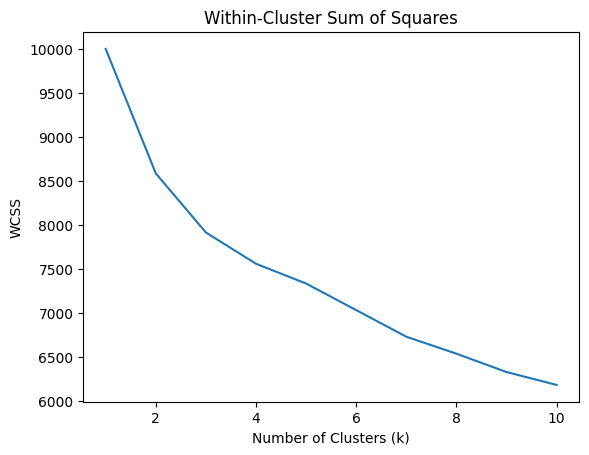

In [14]:
plt.plot(range(1,11), wss)
plt.title('Within-Cluster Sum of Squares')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [16]:
sil_score=[]

for k in range(2,7):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_data)
  labels = kmeans.predict(scaled_data)
  sil_score.append(silhouette_score(scaled_data,labels))

sil_score

[0.13221406310313338,
 0.1113764473444033,
 0.09441465410346066,
 0.08929875555553655,
 0.08812922210416523]

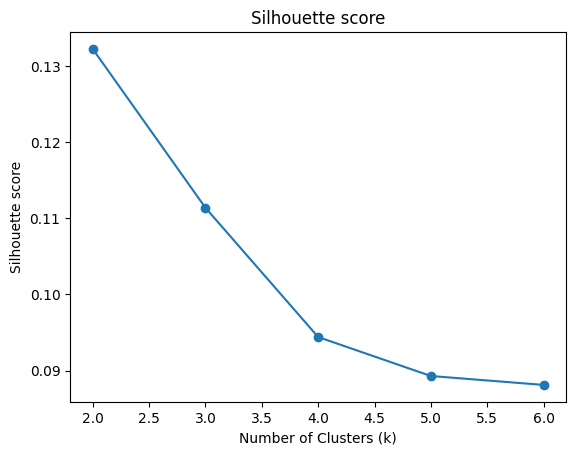

In [17]:
plt.plot(range(2,7), sil_score, marker = 'o')
plt.title('Silhouette score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [18]:
db_index = []

for k in range(2,7):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_data)
  labels = kmeans.predict(scaled_data)
  db_index.append(davies_bouldin_score(scaled_data,labels))
db_index

[2.3906354864970014,
 2.4944634747791414,
 2.585770539363651,
 2.419203883165483,
 2.4930711568853936]

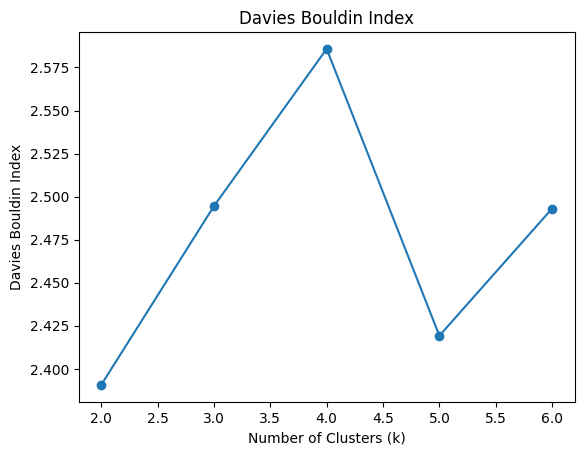

In [19]:
plt.plot(range(2,7), db_index, marker = 'o')
plt.title('Davies Bouldin Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies Bouldin Index')
plt.show()

In [20]:
ch_score = []

for k in range(2,7):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_data)
  labels = kmeans.predict(scaled_data)
  ch_score.append(calinski_harabasz_score(scaled_data,labels))
ch_score



[164.27067387218918,
 131.2433440904481,
 107.11413691477746,
 90.32180923078447,
 83.80892854946546]

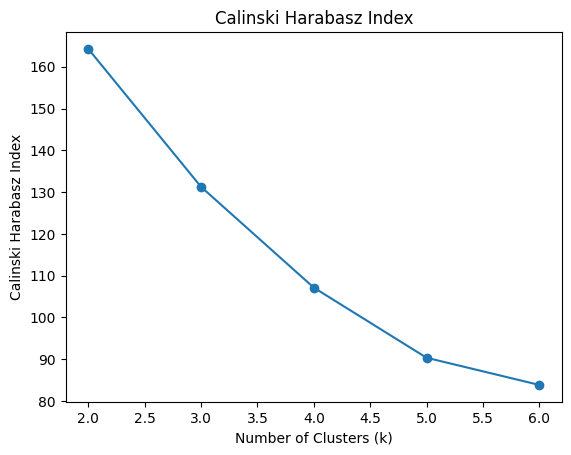

In [21]:
plt.plot(range(2,7), ch_score, marker = 'o')
plt.title('Calinski Harabasz Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski Harabasz Index')
plt.show()

In [24]:
cluster_df['Cluster'] = model.labels_

In [25]:
for i in range(5):
  cluster_dataframe = cluster_df[cluster_df['Cluster'] == i]
  print(f"Cluster {i}:\n{cluster_dataframe}\n")

adj_rand_score = []

for k in range(2,7):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_data)
  labels = kmeans.predict(scaled_data)
  adj_rand_score.append(adjusted_rand_score(cluster_df['Cluster'], labels))
adj_rand_score

Cluster 0:
     CustomerID  CustomerName  Region  SignupDate  TransactionID  ProductID  \
3             0           118       3          34            444         82   
5             1            53       0           3            154         94   
17            3           102       3          46            533         96   
28            6           152       0          30            717         49   
29            6           152       0          30            644         95   
..          ...           ...     ...         ...            ...        ...   
676         137            41       0         170            765         78   
694         140           153       1          67            898         92   
757         153           160       2         169            844         82   
758         153           160       2         169            965         93   
977         193            85       3         159            989         83   

     TransactionDate  Quantity  TotalVal

[0.11830928219156922,
 0.1946047627400636,
 0.23908386137774063,
 0.1944057939217966,
 0.23435164668430403]

In [26]:
mutual_info = mutual_info_score(cluster_df['Cluster'], model.labels_)
print(f"Mutual Information Score: {mutual_info}")

Mutual Information Score: 2.2981182345138165


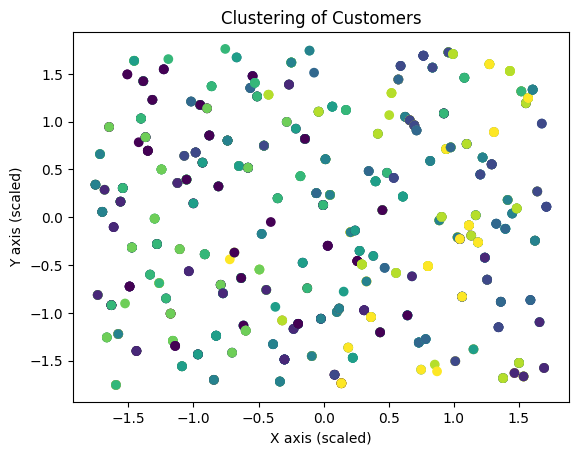

In [28]:
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=model.labels_)
plt.xlabel('X axis (scaled)')
plt.ylabel('Y axis (scaled)')
plt.title('Clustering of Customers')
plt.show()

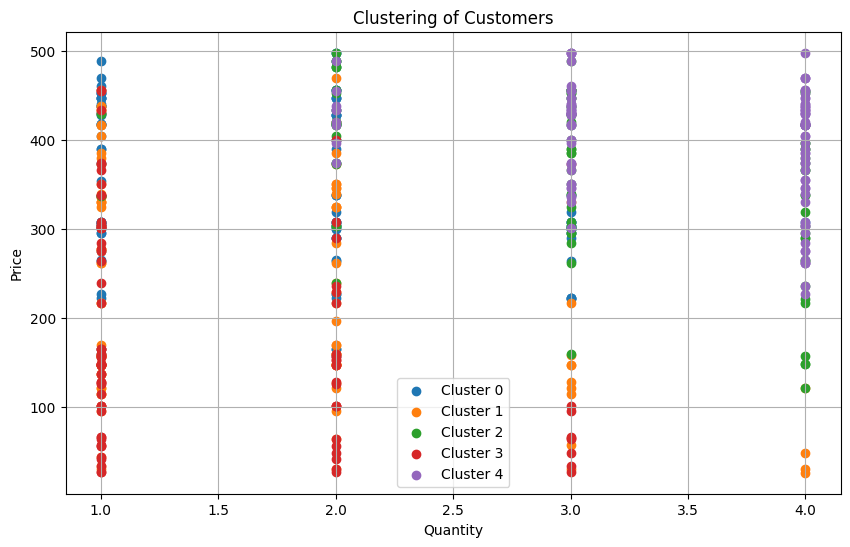

In [33]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization

for i in range(5):
    cluster_data = cluster_df[cluster_df['Cluster'] == i]
    plt.scatter(cluster_data['Quantity'], cluster_data['Price'], label=f'Cluster {i}')

plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Clustering of Customers')
plt.legend()
plt.grid(True)
plt.show()